# Regression Challenge
Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('real_estate.csv')
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Performing **Exploratory Data Analysis** on the given data

In [3]:
df.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [4]:
df.shape

(414, 7)

**Viewing the Label Distribution**

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_13260/174207040.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


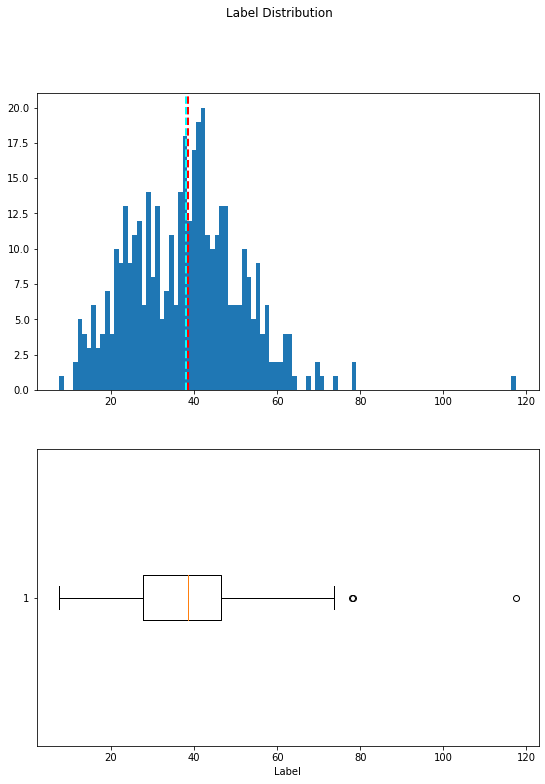

In [5]:
labels = df[df.columns[-1]]
fig, ax = plt.subplots(2, 1, figsize=(9,12))

ax[0].hist(labels, bins=100)
ax[0].set_label('Frequency')

ax[0].axvline(x=labels.mean(), color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=labels.median(), color='red', linestyle='dashed', linewidth=2)

ax[1].boxplot(labels, vert=False)
ax[1].set_xlabel('Label')

fig.suptitle('Label Distribution')
fig.show()

**Removing Outlier Values**

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_13260/4161141207.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


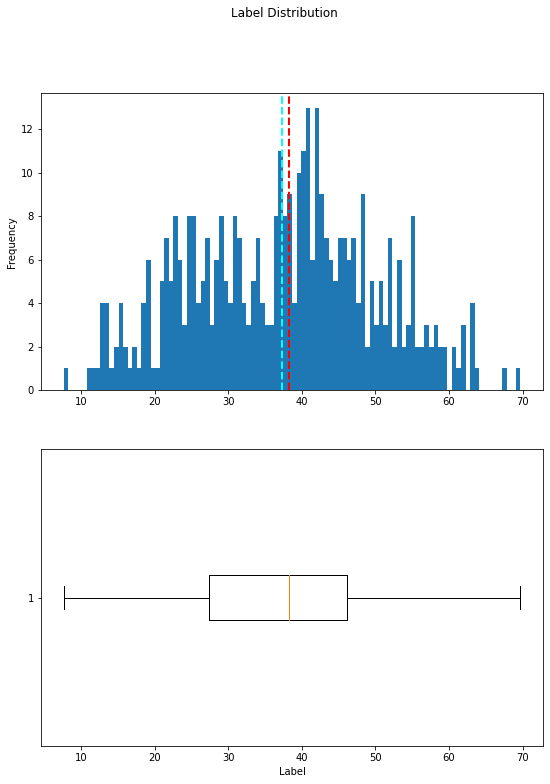

In [6]:
df = df[df['price_per_unit']<70]
labels = df[df.columns[-1]]

fig, ax = plt.subplots(2, 1, figsize=(9,12))

ax[0].hist(labels, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(x=labels.mean(), color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=labels.median(), color='red', linestyle='dashed', linewidth=2)

ax[1].boxplot(x=labels, vert=False)
ax[1].set_xlabel('Label')

fig.suptitle('Label Distribution')
fig.show()

### Viewing Numeric Correlations

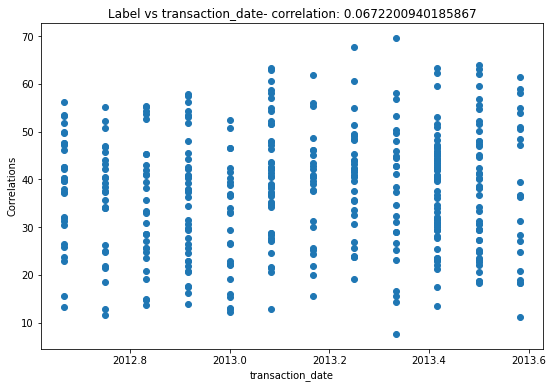

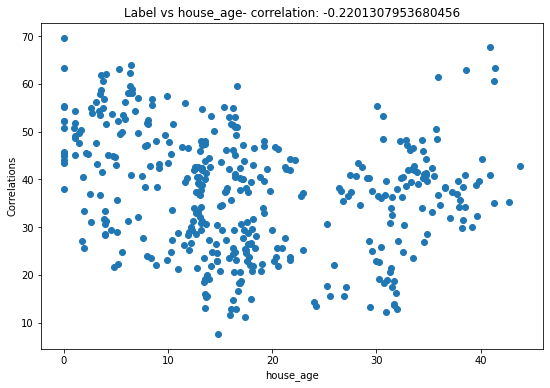

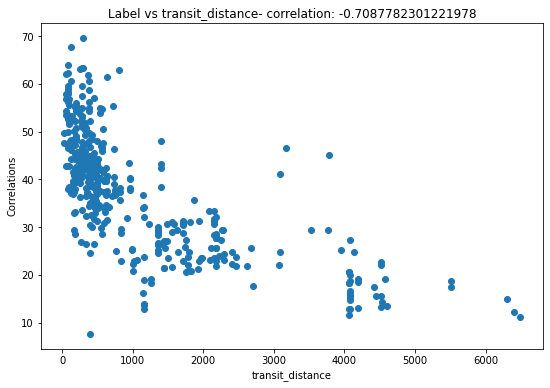

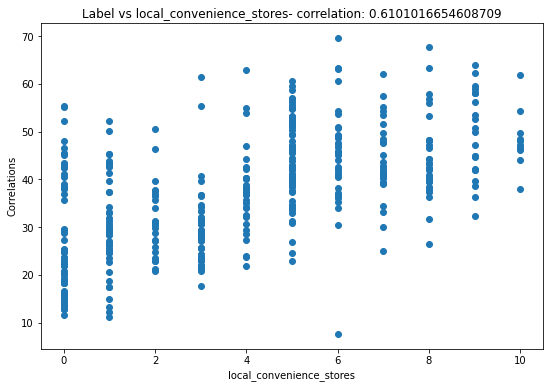

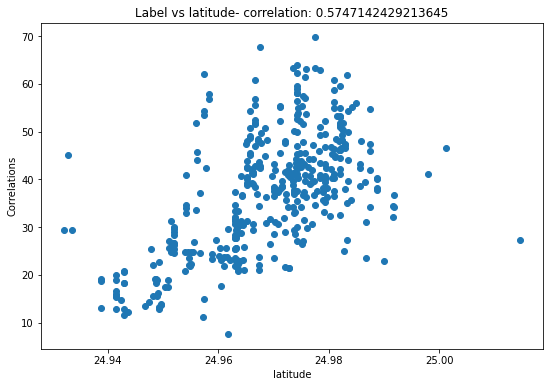

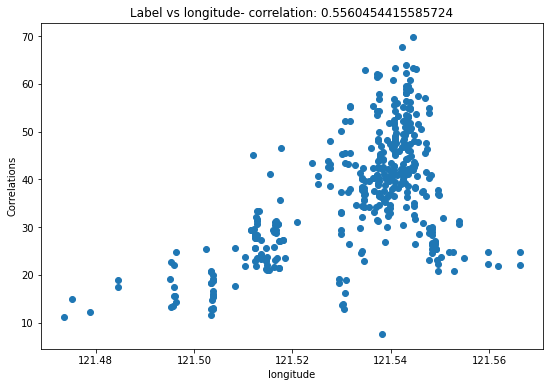

In [7]:
for col in df[df.columns[0:-1]]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca
    feature = df[col]
    correlation = feature.corr(labels)
    plt.scatter(x = feature, y=labels)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    plt.title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

### View Categorical Features
**transaction_date** and **local_convenience_stores** seem to be discrete values, so we will treat them as categorical features



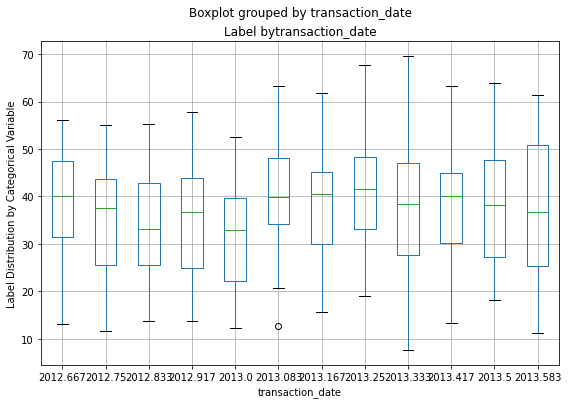

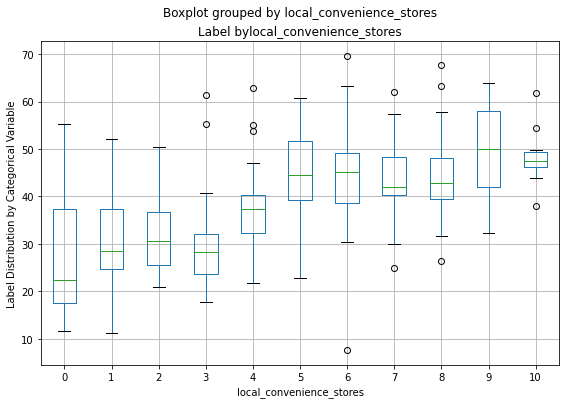

In [8]:
for col in df[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    df.boxplot(column='price_per_unit',by=col, ax = ax)
    ax.set_title('Label by'+col)
    ax.set_ylabel("Label Distribution by Categorical Variable")

### Splitting data for Train, Test and Validation

In [9]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[1:-1]].values, df[df.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print("Training size:", X_train.shape[0])
print("Test size:", y_test.shape[0])

Training size: 285
Test size: 123


### Preprocessing the data and training a model
Using Standard Scaler to Normalise the numeric features and then using Random Forest to train the model.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

rf_model = rf_pipeline.fit(X_train, y_train)
print(rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Evaluating the Model

MSE: 36.945192742076436
RMSE: 6.078255731875423
R2: 0.6847450015470624


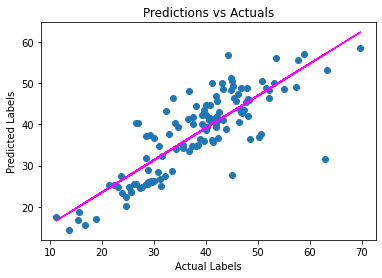

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
r2 = r2_score(y_test, pred)
print("R2:",r2)

plt.scatter(y_test, pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')

### Using the Trained Model to Predict Price per-unit

In [23]:
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
results = rf_model.predict(X_new)
print("Predictions:")
for pred in results:
    print(round(pred,2))

Predictions:
48.54
16.79
